Machine Learning With Python: Linear Regression With One Variable
Sample problem of predicting home price in monroe, new jersey (USA)
The table represents current home prices in monroe township based on square feet area, new jersey
Problem Statement: Given above data build a machine learning model that can predict home prices based on square feet area

You can represent values in above table as a scatter plot (values are shown in red markers). After that one can draw a straight line that best fits values on chart.
You can draw multiple lines like this but we choose the one where total sum of error is minimum
You might remember about linear equation from your high school days math class. Home prices can be presented as following equation,

home price = m * (area) + b

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


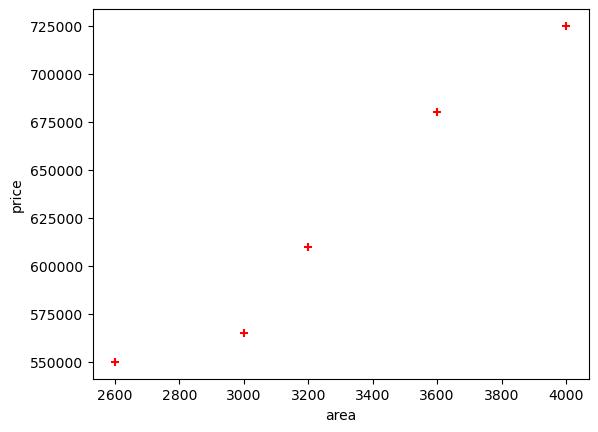

In [3]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')


In [4]:
new_df= df.drop('price', axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [5]:
price= df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [6]:
# Create linear regression object
reg= linear_model.LinearRegression()
#fit means training a linear regression model using the available data points
reg.fit(new_df, price)

LinearRegression()

In [7]:
reg.predict([[3300]])

/Users/KidisGizachew/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [8]:
reg.predict([[5000]])

/Users/KidisGizachew/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [9]:
reg.coef_

array([135.78767123])

In [10]:
reg.intercept_

180616.43835616432

In [11]:
#Y = m * X + b (m is coefficient and b is intercept)

In [12]:
3300*135.78767123 + 180616.43835616432

628715.7534151643

Generate CSV file with list of home price predictions


In [13]:
area_df = pd.read_csv("areas.csv")
area_df.head(3)

,area
0,1000
1,1500
2,2300


In [14]:
p=reg.predict(area_df)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [15]:
#creating a new colum called prices in area_df dataframe and storing the predicted price value for specific area
area_df['prices']=p
area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [16]:
area_df.to_csv("prediction.csv")

Exercise
Predict canada's per capita income in year 2020. You will find canada_per_capita_income.csv file. Using this build a regression model and predict the per capita income fo canadian citizens in year 2020

Answer
41288.69409442

In [17]:
df=pd.read_csv('canada_per_capita_income.csv')
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


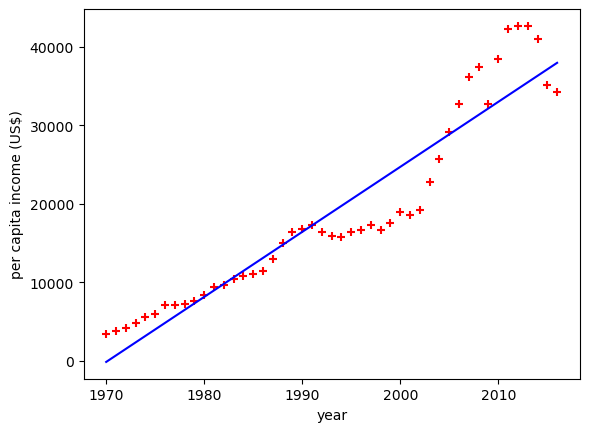

In [24]:
plt.xlabel('year')
plt.ylabel('per capita income (US$)')
plt.scatter(df['year'],df['per capita income (US$)'],color='red',marker='+')
plt.plot(df.year, reg.predict(df[['year']]), color='blue')


In [20]:
new_df=df.drop('per capita income (US$)', axis='columns')
new_df.head()

,year
0,1970
1,1971
2,1972
3,1973
4,1974


In [21]:
income=df['per capita income (US$)']
income.head()

0    3399.299037
1    3768.297935
2    4251.175484
3    4804.463248
4    5576.514583
Name: per capita income (US$), dtype: float64

In [25]:
reg=linear_model.LinearRegression()
reg.fit(new_df, income)

LinearRegression()

In [23]:
reg.predict([[2020]])

/Users/KidisGizachew/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])